# Project Description

You work for a startup that sells food products, and your task is to understand user behavior within the company's application.

Firstly, try to study the sales funnel. Identify the path users need to follow to reach the purchase stage. How many users actually succeed in reaching the purchase stage? How many users drop off at previous stages? At which exact stage does this happen?

Next, examine the results of A/A/B testing (Read on to learn more about A/A/B testing). The web design team wants to change the font for the entire application, but the product manager is concerned that users might find the new design disruptive. They decide to make a decision based on the results of A/A/B testing.

Users are divided into three groups: two control groups are shown the old font version, and one test group is shown the new font version. Your task is to determine which font will yield the best results.

Creating two A groups (controls) does offer certain advantages. We can establish a rule that the testing accuracy will only be accepted if both control groups yield similar results. If there is a significant difference between the two A groups, it can help us identify factors that may distort the results we obtain. Comparing the control groups will also give us an idea of how long it takes and how much data is needed when running the next steps in the process.

You will use the same dataset for regular analysis and for A/A/B analysis. In real-world projects, experiments like these are conducted regularly. Analysts study the application's quality using general data, regardless of whether users participate in the experiment or not.

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth

## Preparing Data

### Optimizing Data Size

In [2]:
df = pd.read_csv('logs_exp_us.csv', sep = '\t')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.9 MB


In [3]:
df['EventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

In [4]:
#df['EventName'] = df['EventName'].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.9 MB


From the information in the data above, it seems there is no missing data. However, we need to check for duplicates if any exist and rename the columns.

### Changing Column Names

In [5]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [6]:
df.columns = ['event_name','device_id','event_time','experiment_id']
df

,event_name,device_id,event_time,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


### Checking for Duplicate Data

In [7]:
df

,event_name,device_id,event_time,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [8]:
df = df.drop_duplicates()
df

,event_name,device_id,event_time,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


It appears there is missing data; let's proceed to check for and address any missing data if present.

### Checking for Missing Data

In [9]:
df.isna().sum()

event_name       0
device_id        0
event_time       0
experiment_id    0
dtype: int64

It seems correct; there is no missing data.

### Now, let's add a column for date and time, as well as a separate column for the date. We will also change the data type of the Timestamp data.

In [10]:
df['event_time_ts'] = pd.to_datetime(df['event_time'], unit='s')
df['date'] = df['event_time_ts'].dt.date

/tmp/ipykernel_59/1124935931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_time_ts'] = pd.to_datetime(df['event_time'], unit='s')
/tmp/ipykernel_59/1124935931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['event_time_ts'].dt.date


### Clean Data

In [11]:
df

,event_name,device_id,event_time,experiment_id,event_time_ts,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


## Studying and Exploring Data

### The number of events in the data

In [12]:
df['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

There are 5 events captured in the data we have, and here is the sequence:
1. Tutorial
2. MainScreenAppear
3. OfferScreenAppear
4. CartScreenAppear
5. PaymentScreenSuccessful

### The number of users recorded in the log

In [13]:
unique_user = df['device_id'].nunique()
unique_user

7551

The number of unique users in the dataset is 7552 users.

### Calculating the Average Number of Events Per User

In [14]:
df

,event_name,device_id,event_time,experiment_id,event_time_ts,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [15]:
mean_event = df.groupby('device_id').agg({'event_name' : 'count'}).reset_index()
mean_event.head(10).sort_values('event_name',ascending=False)

,device_id,event_name
4,7702139951469979,137
9,15708180189885246,126
2,6922444491712477,47
7,9841258664663090,29
5,8486814028069281,10
8,12692216027168046,10
6,8740973466195562,9
3,7435777799948366,6
1,6909561520679493,5
0,6888746892508752,1


In [16]:
print(mean_event['event_name'].mean())

32.27559263673685


On average, users perform events approximately 32 times.

### Determination of Period

Determining the time period covered by the data by finding the maximum and minimum date of the period.

In [17]:
df

,event_name,device_id,event_time,experiment_id,event_time_ts,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [18]:
print(df['date'].max(),df['date'].min())

2019-08-07 2019-07-25


The longest period in the data is from July 25, 2019, to the latest date on August 7. The data spans for a total of 13 days.

<AxesSubplot:xlabel='date', ylabel='Count'>

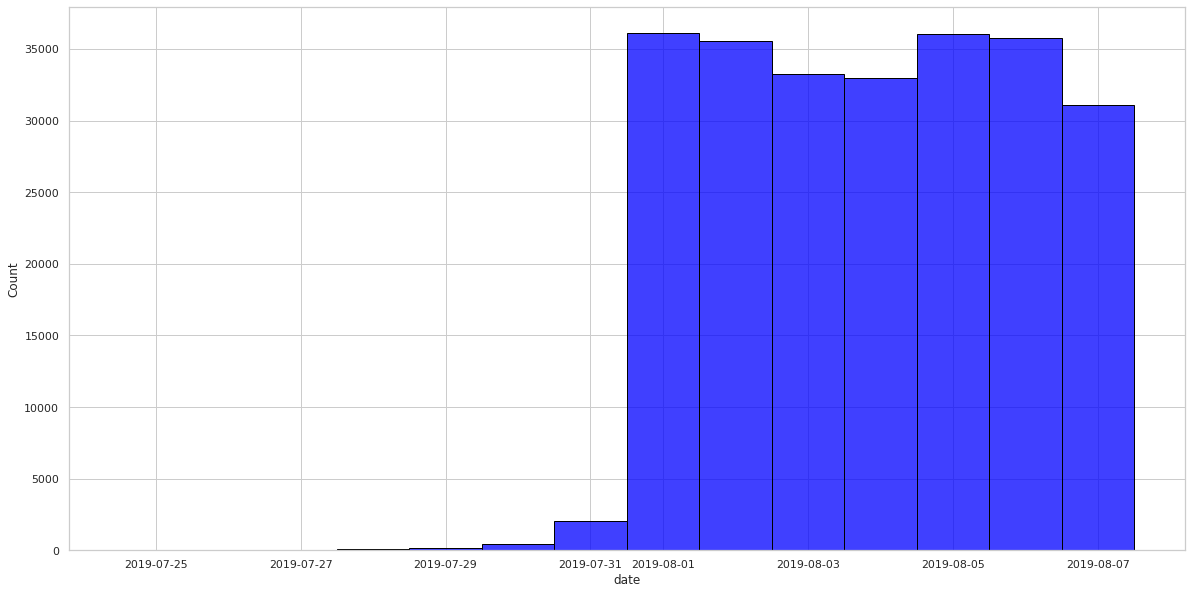

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
sns.histplot(df['date'],color='blue', edgecolor='black')

Certainly, we can filter out the data before July 31, 2023, and ensure that all events are present in the remaining dataset.

In [20]:
df['date'] = pd.to_datetime(df['date'])
df_new = df.query('date >= "2019-07-31"')
df_new

/tmp/ipykernel_59/865145595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,event_name,device_id,event_time,experiment_id,event_time_ts,date
797,MainScreenAppear,3670880358399219515,1564535506,247,2019-07-31 01:11:46,2019-07-31
798,OffersScreenAppear,3799109751993694887,1564536064,248,2019-07-31 01:21:04,2019-07-31
799,Tutorial,1126021718529336913,1564536731,247,2019-07-31 01:32:11,2019-07-31
800,MainScreenAppear,4293428370257583636,1564539558,248,2019-07-31 02:19:18,2019-07-31
801,MainScreenAppear,4567464647598975872,1564540410,247,2019-07-31 02:33:30,2019-07-31
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [21]:
df_new['date'].value_counts()

2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
2019-07-31     2030
Name: date, dtype: int64

We have filtered the data for the desired period and now need to check the groups as well.

In [22]:
df_new['experiment_id'].value_counts()

248    85309
246    79922
247    77686
Name: experiment_id, dtype: int64

In [23]:
df_new['event_name'].value_counts().reset_index()

,index,event_name
0,MainScreenAppear,118578
1,OffersScreenAppear,46707
2,CartScreenAppear,42560
3,PaymentScreenSuccessful,34058
4,Tutorial,1014


In [24]:
event_merge = df['event_name'].value_counts().reset_index().merge(df_new['event_name'].value_counts().reset_index(), on = 'index')
event_merge.columns = ['event_name','df','df_new']
event_merge

,event_name,df,df_new
0,MainScreenAppear,119101,118578
1,OffersScreenAppear,46808,46707
2,CartScreenAppear,42668,42560
3,PaymentScreenSuccessful,34118,34058
4,Tutorial,1018,1014


It appears that there are no significant changes in the two datasets. We can proceed.

## Studying the Event Funnel

In [25]:
df_new

,event_name,device_id,event_time,experiment_id,event_time_ts,date
797,MainScreenAppear,3670880358399219515,1564535506,247,2019-07-31 01:11:46,2019-07-31
798,OffersScreenAppear,3799109751993694887,1564536064,248,2019-07-31 01:21:04,2019-07-31
799,Tutorial,1126021718529336913,1564536731,247,2019-07-31 01:32:11,2019-07-31
800,MainScreenAppear,4293428370257583636,1564539558,248,2019-07-31 02:19:18,2019-07-31
801,MainScreenAppear,4567464647598975872,1564540410,247,2019-07-31 02:33:30,2019-07-31
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


### The events present in the log and their frequency of occurrence.

In [26]:
df_new['event_name'].value_counts().reset_index().sort_values('event_name', ascending = False)

,index,event_name
0,MainScreenAppear,118578
1,OffersScreenAppear,46707
2,CartScreenAppear,42560
3,PaymentScreenSuccessful,34058
4,Tutorial,1014


From the data, it is evident that the frequency of the "Tutorial" event is not high; there are few instances where users view the application tutorial.

### The number of users recorded in the log.

In [27]:
df_all_event_user = df_new.groupby('event_name').agg({'device_id': 'nunique'})
df_all_event_user.reset_index().sort_values('device_id', ascending = False)

,event_name,device_id
1,MainScreenAppear,7429
2,OffersScreenAppear,4606
0,CartScreenAppear,3742
3,PaymentScreenSuccessful,3542
4,Tutorial,845


From the results above, it seems the conversion from MainScreenAppear to PaymentScreenSuccessful is quite substantial. The anomaly here is the low number of users who follow the tutorial. Are they skipping the tutorial?

### Find the number of users performing each action. Sort events based on the number of users.

In [28]:
users = df_new.pivot_table(index='device_id', columns='event_name', values='event_time_ts',aggfunc='min') 
users

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT
...,...,...,...,...,...
9217594193087726423,2019-08-02 09:00:58,NaT,2019-08-02 09:01:08,2019-08-02 09:00:57,NaT
9219463515465815368,2019-08-06 16:49:40,2019-08-05 05:26:26,2019-08-06 16:48:57,2019-08-06 16:52:16,NaT
9220879493065341500,2019-08-02 17:59:16,2019-08-02 17:58:48,2019-08-02 17:59:00,NaT,NaT


Each row of the table represents one user, while the columns contain the time of each event's first occurrence. If no event occurs, the cell's value is NaN.

We will try to create two scenarios, one from the tutorial and one from the main screen.

In [29]:
n_tutorial1 = ~users['Tutorial'].isna()
n_main_screen1 = n_tutorial1 & (users['MainScreenAppear'] > users['Tutorial'])
n_offer1 = n_main_screen1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
n_cart1 = n_offer1 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
n_payment1 = n_cart1 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_tutorials1 = users[n_tutorial1].shape[0]
n_main_screens1 = users[n_main_screen1].shape[0]
n_offers1 = users[n_offer1].shape[0]
n_carts1 = users[n_cart1].shape[0]
n_payments1 = users[n_payment1].shape[0]

print('Tutorial:', n_tutorials1)
print('Adding Main Screen:', n_main_screens1)
print('Starting Offers:', n_offers1)
print('Performing Checkout:', n_carts1)
print('Making Payments:', n_payments1)


Tutorial: 845
Adding Main Screen: 793
Starting Offers: 628
Performing Checkout: 352
Making Payments: 217


In [30]:
ratio_scene1 = (n_payments1 / n_tutorials1)*100
ratio_scene1

25.680473372781066

In [53]:
n_main_screen2 = ~users['MainScreenAppear'].isna()
n_offer2 = n_main_screen2 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
n_cart2 = n_offer2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
n_payment2 = n_cart2 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

n_main_screens2 = users[n_main_screen2].shape[0]
n_offers2 = users[n_offer2].shape[0]
n_carts2 = users[n_cart2].shape[0]
n_payments2 = users[n_payment2].shape[0]

print('Adding Main Screen:', n_main_screens2)
print('Starting Offers:', n_offers2)
print('Performing Checkout:', n_carts2)
print('Making Payments:', n_payments2)

Adding Main Screen: 7429
Starting Offers: 4116
Performing Checkout: 1672
Making Payments: 453


In [32]:
ratio_scene2 = (n_payments2 / n_main_screens2)*100
ratio_scene2

6.097725131242428

Looking at the two scenarios above, the conversion ratio is higher in scenario 1, indicating that the tutorial influences the payment outcome. In contrast, for those who did not watch the tutorial, the ratio of those making payments is lower.

### Temukan Ratio berurutan tiap peristiwa

In [33]:
ratio1_1 = (n_main_screens1 / n_tutorials1)* 100
ratio1_2 = (n_offers1 / n_main_screens1) * 100
ratio1_3 = (n_carts1 / n_offers1) * 100
ratio1_4 = (n_payments1 / n_carts1)*100

print(ratio1_1)
print(ratio1_2)
print(ratio1_3) 
print(ratio1_4)

93.84615384615384
79.19293820933166
56.05095541401274
61.64772727272727


In [34]:
ratio2_1 =  (n_offers2 / n_main_screens2) * 100
ratio2_2 = (n_carts2 / n_offers2) * 100
ratio2_3 = (n_payments2 / n_carts2)*100

print(ratio2_1)
print(ratio2_2)
print(ratio2_3) 


55.40449589446763
40.62196307094266
27.093301435406698


If we look at user retention, it is better in scenario 1, where users view the tutorial first. However, if we examine the most significant drop in the process from offer to cart in both scenarios 1 and 2, it appears that the offer needs improvement.

## Studying the Experiment Results

In [35]:
df_new

,event_name,device_id,event_time,experiment_id,event_time_ts,date
797,MainScreenAppear,3670880358399219515,1564535506,247,2019-07-31 01:11:46,2019-07-31
798,OffersScreenAppear,3799109751993694887,1564536064,248,2019-07-31 01:21:04,2019-07-31
799,Tutorial,1126021718529336913,1564536731,247,2019-07-31 01:32:11,2019-07-31
800,MainScreenAppear,4293428370257583636,1564539558,248,2019-07-31 02:19:18,2019-07-31
801,MainScreenAppear,4567464647598975872,1564540410,247,2019-07-31 02:33:30,2019-07-31
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


### The number of users in each group is as follows:

Important note: Experiment numbers 246 and 247 for the control group (Old Font), 248 for the test group (New Font).

In [36]:
group_unique = df_new.groupby('experiment_id').agg({'device_id':'nunique'}).reset_index().sort_values('device_id',ascending = False)
group_unique

,experiment_id,device_id
2,248,2540
1,247,2517
0,246,2485


Looking at the number of users alone, the difference between groups is not very significant. However, when comparing the test and control groups, the difference in numbers is quite substantial, with the test group being roughly half the size of the control group

### Further examination of the control group.

In [37]:
group_control = df.query('experiment_id in [246, 247]')
group_control

,event_name,device_id,event_time,experiment_id,event_time_ts,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 14:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 20:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 20:31:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [54]:
group_control['experiment_id'] = group_control['experiment_id'].astype(int)
group_control_pivot = group_control.pivot_table(index='experiment_id', columns='event_name', values='device_id', aggfunc='count').reset_index()

group_control_pivot

/tmp/ipykernel_59/625345322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_control['experiment_id'] = group_control['experiment_id'].astype(int)


event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
0,246,14798,38249,14904,11912,318
1,247,12548,39677,15341,10039,345


In [39]:
group_control_pivot_unique = group_control.pivot_table(index='experiment_id', columns='event_name', values='device_id', aggfunc='nunique').reset_index()
group_control_pivot_unique

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
0,246,1270,2456,1545,1202,279
1,247,1240,2482,1530,1160,286


If we look at the data above, there is no significant difference between control groups 246 and 247, both in terms of the number of users and event frequency. The most popular event in these groups is 'MainScreenAppear,' with the highest number of users and frequency compared to other events.

In [40]:
group_control_pivot_unique['total_user'] = group_control_pivot_unique[['CartScreenAppear', 'MainScreenAppear', 'OffersScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']].sum(axis=1)

group_control_pivot_unique['MainScreenAppear_percentage'] = (group_control_pivot_unique['MainScreenAppear'] / group_control_pivot_unique['total_user']) * 100

group_control_pivot_unique

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_user,MainScreenAppear_percentage
0,246,1270,2456,1545,1202,279,6752,36.374408
1,247,1240,2482,1530,1160,286,6698,37.055838


Approximately 36% of users are present in the 'Main_ScreenAppear' event, which is quite substantial compared to other events.

In [41]:
event_columns = ['CartScreenAppear', 'OffersScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
for event in event_columns:
    group_control_pivot_unique[f'{event}_percentage'] = (group_control_pivot_unique[event] / group_control_pivot_unique['total_user']) * 100
    
group_control_pivot_unique

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_user,MainScreenAppear_percentage,CartScreenAppear_percentage,OffersScreenAppear_percentage,PaymentScreenSuccessful_percentage,Tutorial_percentage
0,246,1270,2456,1545,1202,279,6752,36.374408,18.809242,22.882109,17.802133,4.132109
1,247,1240,2482,1530,1160,286,6698,37.055838,18.512989,22.842640,17.318603,4.269931


In [42]:
group_control_pivot_unique[['experiment_id','MainScreenAppear_percentage','CartScreenAppear_percentage',	'OffersScreenAppear_percentage',	'PaymentScreenSuccessful_percentage','Tutorial_percentage']]

event_name,experiment_id,MainScreenAppear_percentage,CartScreenAppear_percentage,OffersScreenAppear_percentage,PaymentScreenSuccessful_percentage,Tutorial_percentage
0,246,36.374408,18.809242,22.882109,17.802133,4.132109
1,247,37.055838,18.512989,22.842640,17.318603,4.269931


Compared to other events, the main screen appear event has the largest percentage. The percentage difference of events compared to the control group is not significantly different.

### Further examination of the test group

"Important note: Experiment numbers 246 and 247 for the control group (Old Font), 248 for the test group (New Font)."

In [43]:
group_test = df.query('experiment_id in [248]')
group_test

,event_name,device_id,event_time,experiment_id,event_time_ts,date
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 11:48:43,2019-07-25
11,MainScreenAppear,2547684315586332355,1564123826,248,2019-07-26 06:50:26,2019-07-26
...,...,...,...,...,...,...
244082,MainScreenAppear,8249271441488197538,1565211813,248,2019-08-07 21:03:33,2019-08-07
244084,OffersScreenAppear,8249271441488197538,1565211823,248,2019-08-07 21:03:43,2019-08-07
244109,MainScreenAppear,5317814261427487562,1565212162,248,2019-08-07 21:09:22,2019-08-07
244110,OffersScreenAppear,5317814261427487562,1565212167,248,2019-08-07 21:09:27,2019-08-07


In [44]:
group_test['experiment_id'] = group_test['experiment_id'].astype(int)
group_test_pivot = group_test.pivot_table(index='experiment_id', columns='event_name', values='device_id', aggfunc='count').reset_index()
group_test_pivot

/tmp/ipykernel_59/2594396460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_test['experiment_id'] = group_test['experiment_id'].astype(int)


event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
0,248,15322,41175,16563,12167,355


In [45]:
group_test_pivot_unique = group_test.pivot_table(index='experiment_id', columns='event_name', values='device_id', aggfunc='nunique').reset_index()
group_test_pivot_unique

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
0,248,1239,2501,1538,1185,282


In [46]:
group_test_pivot_unique['total_user'] = group_test_pivot_unique[['CartScreenAppear', 'MainScreenAppear', 'OffersScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']].sum(axis=1)

event_columns_test = ['MainScreenAppear','CartScreenAppear', 'OffersScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
for event in event_columns_test:
    group_test_pivot_unique[f'{event}_percentage'] = (group_test_pivot_unique[event] / group_test_pivot_unique['total_user']) * 100
    
group_test_pivot_unique

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_user,MainScreenAppear_percentage,CartScreenAppear_percentage,OffersScreenAppear_percentage,PaymentScreenSuccessful_percentage,Tutorial_percentage
0,248,1239,2501,1538,1185,282,6745,37.079318,18.369162,22.802076,17.568569,4.180875


In [47]:
group_test_pivot_unique[['experiment_id','MainScreenAppear_percentage','CartScreenAppear_percentage',	'OffersScreenAppear_percentage',	'PaymentScreenSuccessful_percentage','Tutorial_percentage']]

event_name,experiment_id,MainScreenAppear_percentage,CartScreenAppear_percentage,OffersScreenAppear_percentage,PaymentScreenSuccessful_percentage,Tutorial_percentage
0,248,37.079318,18.369162,22.802076,17.568569,4.180875


### Merging the test and control groups.

In [48]:
combined_df = pd.concat([group_test_pivot_unique, group_control_pivot_unique], ignore_index=True)
combined_df

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_user,MainScreenAppear_percentage,CartScreenAppear_percentage,OffersScreenAppear_percentage,PaymentScreenSuccessful_percentage,Tutorial_percentage
0,248,1239,2501,1538,1185,282,6745,37.079318,18.369162,22.802076,17.568569,4.180875
1,246,1270,2456,1545,1202,279,6752,36.374408,18.809242,22.882109,17.802133,4.132109
2,247,1240,2482,1530,1160,286,6698,37.055838,18.512989,22.842640,17.318603,4.269931


### Font Conclusion

From the results of the test group and control group, it is found that the new font does not have a significant impact. There is no significant difference in percentage and the number of users as well.

## Hypothesis Testing

We will test whether the impact of the font influences the purchase volume, with the hypotheses as follows:

H0 = "There is no significant difference between the proportions of the control group and the test group for MainScreenAppear."

H1 = "There is a significant difference between the proportions of the control group and the test group for MainScreenAppear.

In [49]:
combined_df

event_name,experiment_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,total_user,MainScreenAppear_percentage,CartScreenAppear_percentage,OffersScreenAppear_percentage,PaymentScreenSuccessful_percentage,Tutorial_percentage
0,248,1239,2501,1538,1185,282,6745,37.079318,18.369162,22.802076,17.568569,4.180875
1,246,1270,2456,1545,1202,279,6752,36.374408,18.809242,22.882109,17.802133,4.132109
2,247,1240,2482,1530,1160,286,6698,37.055838,18.512989,22.842640,17.318603,4.269931


We will conduct a test between the control group (246) and the test group (248).

We set the significance level at 0.05.

In [55]:
alpha = .05 # significance level

def hypothesis_test(main_screen, offer_screen):
    mainscreen1 = np.array(main_screen)
    offerscreen1 = np.array(offer_screen)
    p1_1 = mainscreen1[0] / offerscreen1[0]
    p2_1 = mainscreen1[1] / offerscreen1[1]
    p_combined_1 = (mainscreen1[0] + mainscreen1[1]) / (offerscreen1[0] + offerscreen1[1])
    difference_1 = p1_1 - p2_1
    z_value = difference_1 / mth.sqrt(abs(p_combined_1 * (1 - p_combined_1) * (1 / offerscreen1[0] + 1 / offerscreen1[1])))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("There is no significant difference between the proportions of the control group and the test group for the transition from mainscreenappear to offerscreen.")
    else:
        print("There is a significant difference between the proportions of the control group and the test group for the transition from mainscreenappear to offerscreen.")

hypothesis_test([2456, 2501], [1545, 1538])


p-value:  0.305440607759903
There is a significant difference between the proportions of the control group and the test group for the transition from mainscreenappear to offerscreen.


In [56]:
alpha = .05 # significance level

def hypothesis_test(offer_screen, cart_screen):
    cartscreen1 = np.array(cart_screen)
    offerscreen1 = np.array(offer_screen)
    p1_1 = offerscreen1[0] / cartscreen1[0]
    p2_1 = offerscreen1[1] / cartscreen1[1]
    p_combined_1 = (offerscreen1[0] + offerscreen1[1]) / (cartscreen1[0] + cartscreen1[1])
    difference_1 = p1_1 - p2_1
    z_value = difference_1 / mth.sqrt(abs(p_combined_1 * (1 - p_combined_1) * (1 / cartscreen1[0] + 1 / cartscreen1[1])))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("There is no significant difference between the proportions of the control group and the test group for the transition from offerscreen to cartscreen.")
    else:
        print("There is a significant difference between the proportions of the control group and the test group for the transition from offerscreen to cartscreen.")

hypothesis_test([1545, 1538], [1202, 1185])

p-value:  0.6178721186908234
There is a significant difference between the proportions of the control group and the test group for the transition from offerscreen to cartscreen.


In [57]:
alpha = .05 # tingkat signifikansi

def hypothesis_test(cart_screen, payment_screen):
    cartscreen1 = np.array(cart_screen)
    paymentscreen1 = np.array(payment_screen)
    p1_1 = cartscreen1[0] / paymentscreen1[0]
    p2_1 = cartscreen1[1] / paymentscreen1[1]
    p_combined_1 = (cartscreen1[0] + cartscreen1[1]) / (paymentscreen1[0] + paymentscreen1[1])
    difference_1 = p1_1 - p2_1
    z_value = difference_1 / mth.sqrt(abs(p_combined_1 * (1 - p_combined_1) * (1 / paymentscreen1[0] + 1 / paymentscreen1[1])))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("There is no significant difference between the proportions of the control group and the test group for the transition from cartscreen to paymentscreen.")
    else:
        print("There is a significant difference between the proportions of the control group and the test group for the transition from cartscreen to paymentscreen.")

hypothesis_test([1270, 1239], [1203, 1185])


p-value:  0.2836712693724488
There is a significant difference between the proportions of the control group and the test group for the transition from cartscreen to paymentscreen.


From each event, there is no significant difference between the test group and the control group, meaning there is no change when the website's font is replaced.

# Kesimpulan Umum

If we look at the results of the event funnel in both the test group and the control group:

The tutorial has the least number of users and frequency, indicating that many users skip the tutorial session and proceed to the Main Screen. There is a noticeable spike in frequency and users between the tutorial and Main Screen.

If we examine the ratio of users who go through the tutorial first and from the Main Screen, the ratio is larger when users view the tutorial first compared to those who go directly from the Main Screen. Even though there are more users in terms of quantity from the Main Screen.

The highest retention is seen in the event from offer to cart. Perhaps the offered content is not attractive enough and needs improvement.

Regarding the old and new font issue, control groups 246 and 247 do not show a significant difference, nor does 248. Even if there is any, the difference is minimal.

In conclusion, changing the font does not disrupt or significantly affect the data.